# Data Mining Final Project
# Kerem Mehmet Çelikman B1905.090072
# Dataset: Car Evulation dataset

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Import Data Set

In [2]:
Data = pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv',header = None)

In [3]:
Data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
Data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Rename column names


-**Values** vhigh (Very high) , high , Med (Medium) , low

- **buying :** the price of buying car. The values (vhigh , high, med , low).
- **maint :** price of the maintenance. The values (vhigh , high, med , low).
- **doors :** the number of doors in car . This attribute is numeric.
- **persons :** capacity in terms of persons to carry. This attribute is numeric.
- **lug_boot :** The capacity of the size of luggage boot. The values (small ,med ,big )
- **safety :** Describe estimated safety of the car. The values (Low , med , big).
- **class :** evaulation level (unacceptable, acceptable, good, very good).

In [5]:
Column_Name = ['buying','maint', 'doors', 'persons', 'lug_boot', 'safety' ,'class']
Data.columns = Column_Name
Data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [6]:
Data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Checking null variables

In [7]:
Data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
for var in Column_Name:
    print(Data[var].value_counts())
    print('-'*40)

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
----------------------------------------
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
----------------------------------------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
----------------------------------------
persons
2       576
4       576
more    576
Name: count, dtype: int64
----------------------------------------
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
----------------------------------------
safety
low     576
med     576
high    576
Name: count, dtype: int64
----------------------------------------
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
----------------------------------------


- Here , Our data contain a 7 object variables.
- *buying* , *maint* , *doors* , *persons* , *lug_boot* ,*safety* are Features variables.
- *class* is target variable.

In [9]:
for var in Column_Name:
    print("Column :",var ,"\n")
    print(Data[var].unique())
    print('_'*40)

Column : buying 

['vhigh' 'high' 'med' 'low']
________________________________________
Column : maint 

['vhigh' 'high' 'med' 'low']
________________________________________
Column : doors 

['2' '3' '4' '5more']
________________________________________
Column : persons 

['2' '4' 'more']
________________________________________
Column : lug_boot 

['small' 'med' 'big']
________________________________________
Column : safety 

['low' 'med' 'high']
________________________________________
Column : class 

['unacc' 'acc' 'vgood' 'good']
________________________________________


##  Feature Engineering

- (doors , persons) columns contains category values (doors --> '5more') and (person --> 'more').

- So we nedd to replace these values with other values to convert these columns to numeric columns. 

In [10]:
Data['doors'] = np.where(Data['doors'] == '5more' , '5' ,Data['doors'])
Data['persons'] = np.where(Data['persons'] == 'more' , '5' ,Data['persons'])

In [11]:
Data['doors'] = Data['doors'].astype(int)
Data['persons'] = Data['persons'].astype(int)

In [12]:
Categories = [var for var in Data.columns if Data[var].dtype == 'O']
Categories

['buying', 'maint', 'lug_boot', 'safety', 'class']

###  Encode the non numerical value to numerical values
* The values in categories column is ordinal. That is meaning to encode these columns we use only (**LabelEncoder** or **OrdinalEncoder**). 

In [13]:
encoder = OrdinalEncoder()
Data[Categories] = encoder.fit_transform(Data[Categories])
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   buying    1728 non-null   float64
 1   maint     1728 non-null   float64
 2   doors     1728 non-null   int64  
 3   persons   1728 non-null   int64  
 4   lug_boot  1728 non-null   float64
 5   safety    1728 non-null   float64
 6   class     1728 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 94.6 KB


In [14]:
Data['buying'] = Data['buying'].astype(int)
Data['maint'] = Data['maint'].astype(int)
Data['lug_boot'] = Data['lug_boot'].astype(int)
Data['safety'] = Data['safety'].astype(int)
Data['class'] = Data['class'].astype(int)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


## Declare Predictor and Responce Variables


In [15]:
X = Data.drop(['class'] , axis = 1)
Y = Data['class']

##  Split the data into training and test data

In [16]:
X_train, X_test,Y_train,Y_test = train_test_split(X , Y ,test_size = 0.25 , random_state = 42) 

In [17]:
#Get the shape of training and test data
print("X Training set =",X_train.shape)
print("X Test set =",X_test.shape)
print("Y Training set =",Y_train.shape)
print("Y Test set =",Y_test.shape)

X Training set = (1296, 6)
X Test set = (432, 6)
Y Training set = (1296,)
Y Test set = (432,)


###  Build Decision tree model 

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

#### Predict Results

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy:", accuracy)

report=classification_report(Y_test,y_pred)
print("Classification Score:\n",report)

Accuracy: 0.9791666666666666
Classification Score:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       103
           1       0.70      0.93      0.80        15
           2       1.00      1.00      1.00       294
           3       1.00      0.95      0.97        20

    accuracy                           0.98       432
   macro avg       0.92      0.95      0.93       432
weighted avg       0.98      0.98      0.98       432



# Check overfitting or underfitting


In [21]:
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print detailed classification reports
print("\nTraining Classification Report:\n", classification_report(Y_train, y_train_pred))
print("\nTesting Classification Report:\n", classification_report(Y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9791666666666666

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00       916
           3       1.00      1.00      1.00        45

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       103
           1       0.70      0.93      0.80        15
           2       1.00      1.00      1.00       294
           3       1.00      0.95      0.97        20

    accuracy                           0.98       432
   macro avg       0.92      0.95      0.93       432
weighted avg       0.98      0.98      0.98       432



 model performs very well, with only a small amount of overfitting

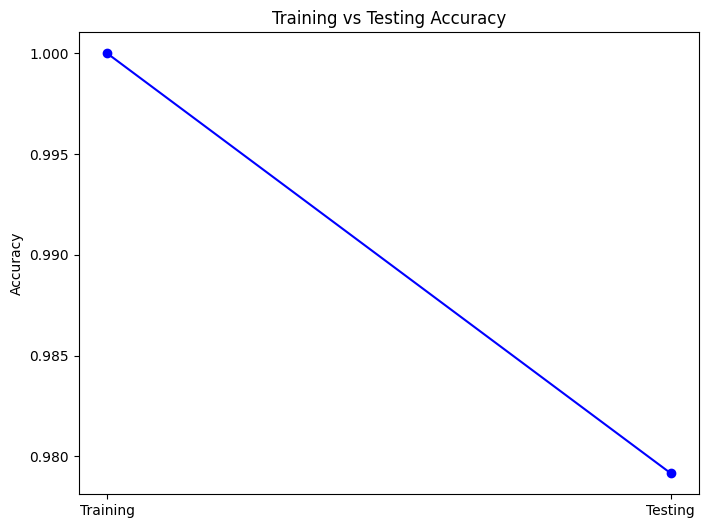

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o', color='blue')
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.show()